<a href="https://colab.research.google.com/github/garima3012/-internship/blob/main/RProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src=https://upload.wikimedia.org/wikipedia/commons/6/6b/WhatsApp.svg alt="Drawing" width="300" length="200">
</center>

<center><font size="4" color="blue"><b><u> ACKNOWLEDGEMENT </u></b></font></center><br>

<h3><center>First and foremost, we would like to thank Dr. GOONJAN JAIN who guided us in during this project. She provided us with invaluable advice and helped us in difficult periods. Her motivation and help has contributed tremendously to the successful completion of this project. Without that support we couldn’t have succeeded in completing this project. Last but not the least, we would like to thank everyone who helped and motivated us to work on this project.</h3></center>

# Data Gathering and Filtering


## To remove an entire string containing specific word

In [2]:
bad_words = ['<Media omitted>']

with open('oldchat.txt') as oldfile, open('chat.txt', 'w') as newfile:
    for line in oldfile:
        if not any(bad_word in line for bad_word in bad_words):
            newfile.write(line)

## Installing all the dictionaries/libraries required

In [3]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.9 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=e59bdfc465ba6eb0999e628a0b018ceff8a875dd61e5d6fa1251ecb7d7b92c23
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [4]:
pip install stopwords


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import plotly.express as px

In [8]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import nltk 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk.corpus
dir(nltk.corpus)
import stopwords
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

<i><b>re / regex :</b>A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression.<br>
<b>pandas :</b> It can perform five significant steps required for processing and analysis of data irrespective of the origin of the data, i.e., load, manipulate, prepare, model, and analyze.Handle multiple operations of the data sets such as subsetting, slicing, filtering, groupBy, re-ordering, and re-shaping.<br>
<b>numpy :</b> NumPy stands for numeric python which is a python package for the computation and processing of the multidimensional and single dimensional array elements.NumPy provides a convenient and efficient way to handle the vast amount of data. NumPy is also very convenient with Matrix multiplication and data reshaping. NumPy is fast which makes it reasonable to work with a large set of data.Moreover,Numpy is required for operating the Pandas.<br>
<b>emoji :</b>It is used to recognise and insert emojis in python.<br>
<b>plotly :</b>Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts. <br>
<b>counter :</b>A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts.<br>
<b>nltk :</b>NLTK is a standard python library with prebuilt functions and utilities for the ease of use and implementation. It is one of the most used libraries for natural language processing and computational linguistics.<br>
<b>stopword :</b>Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.<br>
<b>datetime :</b>Python Datetime module supplies classes to work with date and time. These classes provide a number of functions to deal with dates, times and time intervals. Date and datetime are an object in Python, so when you manipulate them, you are actually manipulating objects and not string or timestamps.<br>
<b>matplotlib:  </b>matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.<br>
<b>seaborn :</b>Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.It is used for data visualization and exploratory data analysis.<br>
<b>os :</b> The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.<br>
<b>PIL :</b>Python Imaging Library is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.<br>
<b>wordcloud :</b>Word Clouds (also known as wordle, word collage or tag cloud) are visual representations of words that give greater prominence to words that appear more frequently.<br>







## defining a function startsWithDateAndTime() ,FindAuthor() and GetDataPoint() to split the text and recognise authors,dates and line seperately

In [9]:
def startsWithDateAndTime(s):
    pattern = '^\d{1,2}/\d{1,2}/\d{1,2}, \d{1,2}:\d{1,2}\S [AaPp][Mm] -'
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # Nombre
        '([\w]+[\s]+[\w]+):',              # Nombre + Apellido
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # Nombre + Segundo Nombre + Apellido
        '([\w]+)[\u263a-\U0001f999]+:',    # Nombre con Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return dateTime, author, message

In [10]:
parsedData = [] 

conversationPath = 'chat.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() 
    messageBuffer = [] 
    datetime, author = None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([dateTime, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            dateTime, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
   
chat = pd.DataFrame(parsedData, columns=['DateTime', 'Author', 'Message']) 

In [11]:
chat.head()

DateTime      Author                        Message
0  31/08/21, 2:57 pm  Prachi DTU             Thank god Abhi ni😌
1  31/08/21, 2:57 pm   Divya DTU                             🥲🥲
2  31/08/21, 2:59 pm  Joshua DTU  Ab toh koi class nhi h na ???
3  31/08/21, 2:59 pm   Jyoti DTU                            😂😂😂
4  31/08/21, 3:00 pm   Jyoti DTU                       Hmesha😂😂

## Using alias to change the author names to anonymous names 

In [13]:
ducktales_group = list(chat.Author.unique())
ducktales_group
aliases = ['User 1','User 2','User 3','User 4','User 5','User 6','User 7','User 8','User 9','User 10','User 11','User 12','User 13','User 14','User 15','User 16','User 17','User 18','User 19','User 20','User 21','User 22','User 23','User 24','User 25','User 26','User 27','User 28','User 29','User 30','User 31','User 32','User 33','User 34','User 35','User 36','User 37','User 38','User 39','User 40','User 41','User 42','User 43','User 44','User 45','User 46','User 47','User 48','User 49','User 50','User 51','User 52','User 53','User 54','User 55','User 56','User 57','User 58','User 59','User 60','User 61','User 62','User 63']
chat['Author'].replace(ducktales_group, aliases, inplace=True)
for(name, alias) in zip(ducktales_group, aliases):
   chat.Message = chat.Message.str.replace(name,alias)
chat.head(10)

DateTime  Author                                      Message
0  31/08/21, 2:57 pm  User 1                           Thank god Abhi ni😌
1  31/08/21, 2:57 pm  User 2                                           🥲🥲
2  31/08/21, 2:59 pm  User 3                Ab toh koi class nhi h na ???
3  31/08/21, 2:59 pm  User 4                                          😂😂😂
4  31/08/21, 3:00 pm  User 4                                     Hmesha😂😂
5  31/08/21, 3:00 pm  User 4                                           😂😂
6  31/08/21, 3:00 pm  User 4                                          😂😂😂
7  31/08/21, 3:00 pm  User 2  Ohho yr jyoti mujhe toh aana hi nhi tha na🙂
8  31/08/21, 3:01 pm  User 4                                  Lg to rha h
9  31/08/21, 3:01 pm  User 4                                           😂😂

## List of all the things we will be considering in this project
  

In [14]:
chat["DateTime"] = pd.to_datetime(chat["DateTime"])
chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35048 entries, 0 to 35047
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  35048 non-null  datetime64[ns]
 1   Author    35048 non-null  object        
 2   Message   35048 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 821.6+ KB


In [15]:
#new column weekday
chat['weekday'] = chat['DateTime'].apply(lambda x: x.day_name())
# new column month_sent
chat['month_sent'] = chat['DateTime'].apply(lambda x: x.month_name()) 
#column date
chat['date'] = [d.date() for d in chat['DateTime']] 
#column hour
chat['hour'] = [d.time().hour for d in chat['DateTime']]


In [16]:
#column urlcount
URLPATTERN = r'(https?://\S+)'
chat['urlcount'] = chat.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
#column Letter_Count
chat['Letter_Count'] = chat['Message'].apply(lambda s : len(s))
#column Word_Count
chat['Word_Count'] = chat['Message'].apply(lambda s : len(s.split(' ')))

## defining split_count() to recognise the emojis used in the messages.

In [17]:
def split_count(text):
  emoji_list = []
  emo_list=["\U0001F44A","\U0001F389","U0002640","\U0001F937","\U0001F926","\U0001F926","\U0001F926","\U0001F4AA","\U0001F44F","\U0001F64F","\U0001F44D","\U0001F973","\U0001F91F","\U0001F4AF","\U0001F92C","\U0001F648","\U0001F620","\U0001F624","\U0001F971","\U0001F621","\U0001F629","\U0001F62B","\U0001F613","\U0001F61E","\U0001F616","\U0001F631","\U0001F62D","\U0001F622","\U0001F625","\U0001F97A","\U0001F641","\U0001F61F","\U0001F632","\U0001F929","\U0001F615","\U0001F60E","\U0001F92F","\U0001F92E","\U0001F62C","\U0001F644","\U0001F60F","\U0001F636","\U0001F611","\U0001F602","\U0001F923","\U0001F641","\U0001F600","\U0001F642","\U0001F605","\U0001F643","\U0001F609","\U0001F970","\U0001F920","\U0001F60C","\U0001F60D","\U0001F618","\U0001F972","\U0001F61B","\U0001F61D","\U0001F917","\U0001F92D","\U0001F914","\U0001F928","\U0001F612","\U0001F60F","\U0001F614","\U0001F634"]  
  data = regex.findall(r'\X', text)
  for word in data:
      if any(char in emo_list for char in word):
         emoji_list.append(word)
  return emoji_list
chat["emoji"] = chat["Message"].apply(split_count) 

In [18]:
chat.head(20)

DateTime  Author  \
0  2021-08-31 14:57:00  User 1   
1  2021-08-31 14:57:00  User 2   
2  2021-08-31 14:59:00  User 3   
3  2021-08-31 14:59:00  User 4   
4  2021-08-31 15:00:00  User 4   
5  2021-08-31 15:00:00  User 4   
6  2021-08-31 15:00:00  User 4   
7  2021-08-31 15:00:00  User 2   
8  2021-08-31 15:01:00  User 4   
9  2021-08-31 15:01:00  User 4   
10 2021-08-31 15:02:00  User 4   
11 2021-08-31 15:02:00  User 2   
12 2021-08-31 15:03:00  User 4   
13 2021-08-31 15:29:00  User 3   
14 2021-08-31 15:30:00  User 3   
15 2021-08-31 15:30:00  User 5   
16 2021-08-31 16:15:00  User 6   
17 2021-08-31 16:37:00  User 7   
18 2021-08-31 17:22:00  User 8   
19 2021-08-31 17:32:00  User 9   

                                              Message  weekday month_sent  \
0                                  Thank god Abhi ni😌  Tuesday     August   
1                                                  🥲🥲  Tuesday     August   
2                       Ab toh koi class nhi h na ???  Tuesday     August   
3                                                 😂😂😂  Tuesday     August   
4                                            Hmesha😂😂  Tuesday     August   
5                                                  😂😂  Tuesday     August   
6                                                 😂😂😂  Tuesday     August   
7         Ohho yr jyoti mujhe toh aana hi nhi tha na🙂  Tuesday     August   
8                                         Lg to rha h  Tuesday     August   
9                                                  😂😂  Tuesday     August   
10                                                Nhi  Tuesday     August   
11  Jyoti ko sare kaam khtm krne do aaj sbka reply...  Tuesday     August   
12                                          Krdiya😂😎😂  Tuesday     August   
13  Telegram pr check krke btaao aaj ki ODE k lect...  Tuesday     August   
14                                                  🤔  Tuesday     August   
15                                              Aagyi  Tuesday     August   
16  *Your Attention is needed*  Me and @9199990772...  Tuesday     August   
17                                          Okay cool  Tuesday     August   
18                                    No problem krlo  Tuesday     August   
19                                              cool😌  Tuesday     August   

          date  hour  urlcount  Letter_Count  Word_Count      emoji  
0   2021-08-31    14         0            18           4        [😌]  
1   2021-08-31    14         0             2           1     [🥲, 🥲]  
2   2021-08-31    14         0            29           8         []  
3   2021-08-31    14         0             3           1  [😂, 😂, 😂]  
4   2021-08-31    15         0             8           1     [😂, 😂]  
5   2021-08-31    15         0             2           1     [😂, 😂]  
6   2021-08-31    15         0             3           1  [😂, 😂, 😂]  
7   2021-08-31    15         0            43          10        [🙂]  
8   2021-08-31    15         0            11           4         []  
9   2021-08-31    15         0             2           1     [😂, 😂]  
10  2021-08-31    15         0             3           1         []  
11  2021-08-31    15         0            53          11        [😂]  
12  2021-08-31    15         0             9           1  [😂, 😎, 😂]  
13  2021-08-31    15         0           121          28         []  
14  2021-08-31    15         0             1           1        [🤔]  
15  2021-08-31    15         0             5           1         []  
16  2021-08-31    16         0           884         160         []  
17  2021-08-31    16         0             9           2         []  
18  2021-08-31    17         0            15           3         []  
19  2021-08-31    17         0             5           1        [😌]

## Drawing line graph to show the frequency of chats in different months 

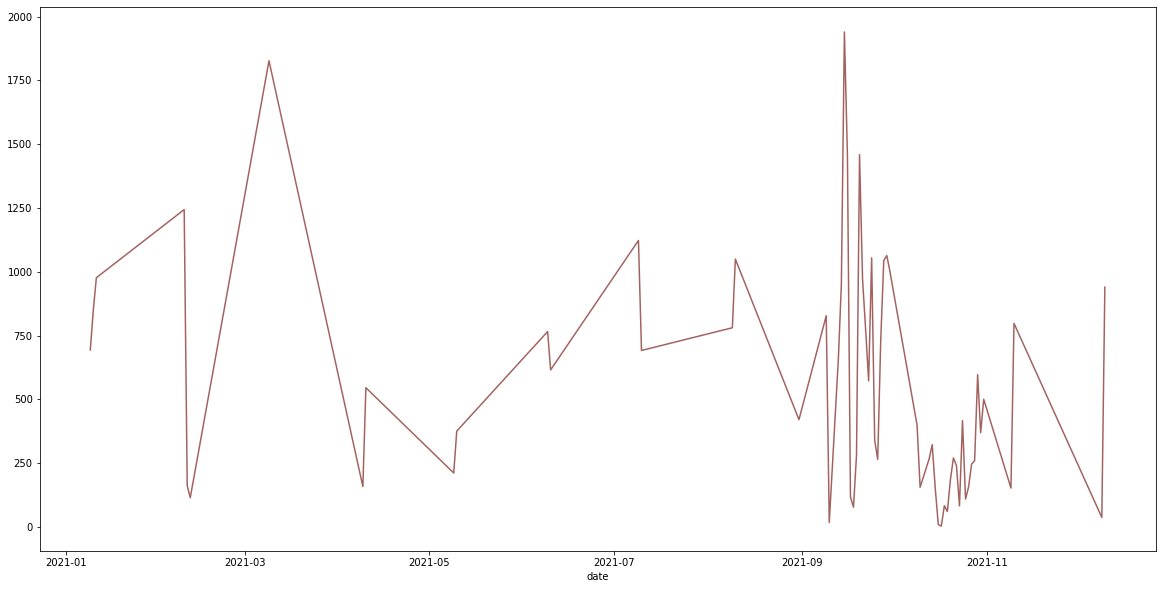

In [19]:
date_grouped = chat.groupby('date')['Message'].count().plot(kind='line', figsize=(20,10), color='#A26360')

## Pictorial representation of frequency of messages sent on the basis of week days

In [20]:

weekday_grouped_msg =  (chat.set_index('weekday')['Message']
                          .groupby(level=0)
                          .value_counts()
                          .groupby(level=0)
                          .sum()
                          .reset_index(name='count'))
weekday_grouped_msg

fig = px.line_polar(weekday_grouped_msg, r='count', theta='weekday', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

## Bar graph representation of frequency of messages on the basis of hour of the day

In [21]:
hour_grouped_msg =  (chat.set_index('hour')['Message']
                          .groupby(level=0)
                          .value_counts()
                          .groupby(level=0)
                          .sum()
                          .reset_index(name='count'))
fig = px.bar(hour_grouped_msg, x='hour', y='count',
                 labels={'hour':'24 Hour Period'}, 
                 height=400)
fig.update_traces(marker_color='#EDCC8B', marker_line_color='#D4A29C',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Total Messages by Hour of the Day')
fig.show()


## ANALYSIS

In [22]:
total_messages = chat.shape[0]
media_messages = chat[chat['Message'] == '<Multimedia omitido>'].shape[0]
average_message_words = chat['Word_Count'].mean()
average_message_letters = chat['Letter_Count'].mean()
average_message_day = chat.groupby('date')['Message'].count().mean()
print('Total Messages ',total_messages)
print('Media Message', media_messages)
print('Average Words by Messages', round(average_message_words, 2))
print('Average Letters by Messages', round(average_message_letters, 2))
print('Average Message Per Day', round(average_message_day, 2))

Total Messages  35048
Media Message 0
Average Words by Messages 5.22
Average Letters by Messages 24.27
Average Message Per Day 556.32


In [23]:
import plotly.express as px
grouped_by_month_and_day = chat.groupby(['month_sent', 'weekday'])['Message'].value_counts().reset_index(name='count')
grouped_by_month_and_day
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pt = grouped_by_month_and_day.pivot_table(index= 'month_sent', columns= 'weekday', values='count').reindex(index=months, columns= days)
fig = px.imshow(pt,labels=dict(x="Day of Week", y="Months", color="Count"),x=days,y=months)
fig.update_layout(width = 700, height = 700)
fig.show()

## Involvement of each author in the group

User 10    5766
User 2     3303
User 15    2226
User 24    2176
User 35    2123
           ... 
User 62       2
User 61       1
User 47       1
User 60       1
User 55       1
Name: Author, Length: 63, dtype: int64

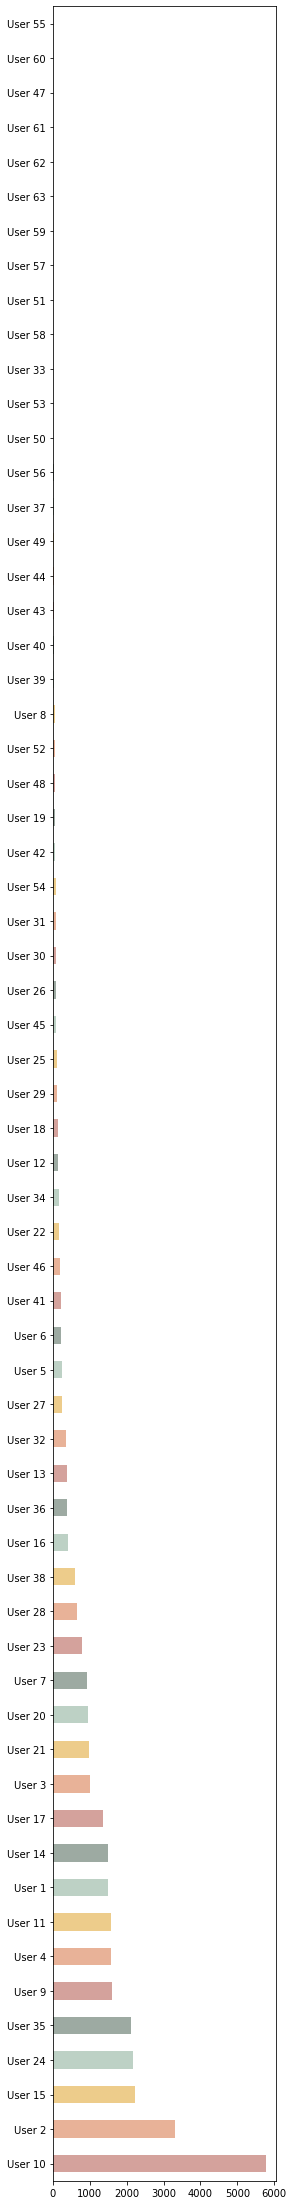

In [24]:
qty_message_author = chat['Author'].value_counts()
qty_message_author.plot(kind='barh',figsize=(4,40), color=['#D4A29C', '#E8B298', '#EDCC8B', '#BDD1C5', '#9DAAA2'])
qty_message_author

User 10    91.523810
User 2     52.428571
User 15    35.333333
User 24    34.539683
User 35    33.698413
             ...    
User 62     0.031746
User 61     0.015873
User 47     0.015873
User 60     0.015873
User 55     0.015873
Name: Author, Length: 63, dtype: float64

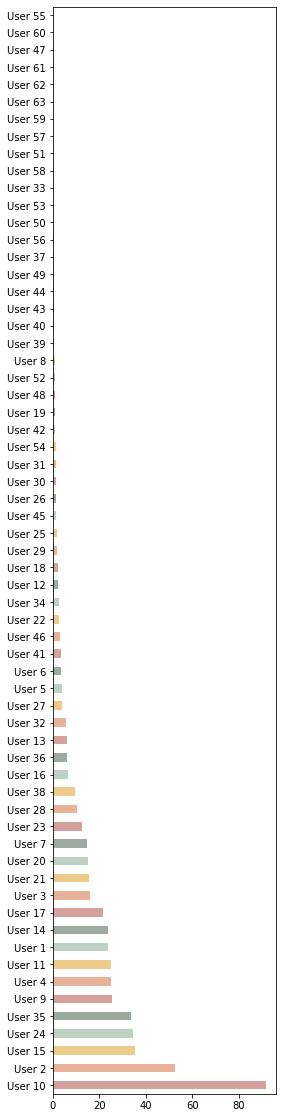

In [25]:
qty_message_author = chat['Author'].value_counts()
avg = (qty_message_author)/63
avg.plot(kind='barh',figsize=(4,20), color=['#D4A29C', '#E8B298', '#EDCC8B', '#BDD1C5', '#9DAAA2'])
avg

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Representation of most used words or emojis in the group

In [27]:
commond_words = chat[['Author','Message']].copy()

from nltk.corpus import stopwords
STOPWORDS = stopwords.words('spanish')

stopwords = list(STOPWORDS)
extra = ["<multimedia", "omitido>", "k", "d","si","multimedia", "omitido"]
stopwords = stopwords + extra
commond_words["Message"] = (commond_words["Message"]
                           .str.lower()
                           .str.split()
                           .apply(lambda x: [item for item in x if item not in stopwords])
                           .explode()
                           .reset_index(drop=True)
                 )


commond_words['Message']= commond_words['Message'].replace('nan', np.NaN)
commond_words['Message']= commond_words['Message'].replace('', np.NaN)
commond_words['Message']= commond_words.Message.str.replace(r"(a|j)?(ja)+(a|j)?", "jaja")
commond_words['Message']= commond_words.Message.str.replace(r"(a|j)?(jaja)+(a|j)?", "jaja")


words_dict = dict(Counter(commond_words.Message))
words_dict = sorted(words_dict.items(), key=lambda x: x[1], reverse=True)

words_dict = pd.DataFrame(words_dict, columns=['words', 'count'])

fig = px.bar(words_dict.head(10).dropna(), x='words', y='count',
                 labels={'words':'Common Words'}, 
                 height=400)
fig.update_traces(marker_color='#EDCC8B', marker_line_color='#D4A29C',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Commond Words Chart')
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning:

The default value of regex will change from True to False in a future version.



In [28]:
TopTen =5
author_commond_words =  (commond_words.set_index('Author')['Message']
                          .dropna()
                          .groupby(level=0)
                          .value_counts()
                          .groupby(level=0)
                          .head(TopTen)
                          .rename_axis(('Author','words'))
                          .reset_index(name='count'))

l = author_commond_words.Author.unique()
for i in range(len(l)):
    dummy_df = author_commond_words[author_commond_words['Author'] == l[i]]
    print(dummy_df)
    print('Most Commond Words by', l[i])
    fig = px.bar(dummy_df, x='words', y='count',
                 labels={'words':'Author Common Words'}, 
                 height=380)
    fig.update_traces(marker_color='#EDCC8B', marker_line_color='#D4A29C',
                  marker_line_width=1.5, opacity=0.6)
    fig.update_layout(title_text='Author Commond Words Chart')
    fig.show()

   Author words  count
0  User 1     h     53
1  User 1    to     23
2  User 1    😂😂     20
3  User 1    ho     18
4  User 1   nhi     18
Most Commond Words by User 1


    Author words  count
5  User 10     h    208
6  User 10   nhi     92
7  User 10    to     80
8  User 10   bhi     64
9  User 10   toh     60
Most Commond Words by User 10


     Author words  count
10  User 11     h     77
11  User 11   nhi     31
12  User 11   bhi     25
13  User 11    to     22
14  User 11   toh     18
Most Commond Words by User 11


     Author words  count
15  User 12     h      3
16  User 12    hi      3
17  User 12    kl      3
18  User 12    kr      3
19  User 12   nhi      3
Most Commond Words by User 12


     Author words  count
20  User 13   toh     11
21  User 13     h     10
22  User 13    hi      8
23  User 13   nhi      7
24  User 13    na      5
Most Commond Words by User 13


     Author words  count
25  User 14     h     54
26  User 14    to     22
27  User 14    hi     20
28  User 14   nhi     20
29  User 14     m     18
Most Commond Words by User 14


     Author words  count
30  User 15     h     75
31  User 15   nhi     34
32  User 15    hi     29
33  User 15    to     28
34  User 15   bhi     25
Most Commond Words by User 15


     Author words  count
35  User 16     h     13
36  User 16     m     11
37  User 16   nhi      9
38  User 16   kya      7
39  User 16    to      7
Most Commond Words by User 16


     Author words  count
40  User 17     h     47
41  User 17   nhi     24
42  User 17   kya     18
43  User 17    to     18
44  User 17   bhi     17
Most Commond Words by User 17


     Author          words  count
45  User 18              h      4
46  User 18              m      4
47  User 18  @919818198254      3
48  User 18             kr      3
49  User 18            sir      3
Most Commond Words by User 18


     Author   words  count
50  User 19       h      5
51  User 19  dikkat      2
52  User 19      ko      2
53  User 19      to      2
54  User 19       2      1
Most Commond Words by User 19


    Author words  count
55  User 2     h    110
56  User 2   nhi     49
57  User 2    to     46
58  User 2    ki     44
59  User 2     m     40
Most Commond Words by User 2


     Author words  count
60  User 20     h     26
61  User 20    to     19
62  User 20    hi     15
63  User 20    ye     11
64  User 20     m     10
Most Commond Words by User 20


     Author words  count
65  User 21     h     29
66  User 21   nhi     20
67  User 21    to     17
68  User 21    hi     15
69  User 21    ka     12
Most Commond Words by User 21


     Author  words  count
70  User 22      h      9
71  User 22  class      3
72  User 22    koi      3
73  User 22      m      3
74  User 22    pta      3
Most Commond Words by User 22


     Author words  count
75  User 23     h     33
76  User 23    to     17
77  User 23   nhi     14
78  User 23   kya     10
79  User 23   bhi      8
Most Commond Words by User 23


     Author words  count
80  User 24     h     86
81  User 24    to     38
82  User 24    hi     33
83  User 24   nhi     32
84  User 24    ho     26
Most Commond Words by User 24


     Author  words  count
85  User 25      h      3
86  User 25   this      3
87  User 25    toh      3
88  User 25  class      2
89  User 25   i'll      2
Most Commond Words by User 25


     Author  words  count
90  User 26   abhi      2
91  User 26    bhi      2
92  User 26    hai      2
93  User 26     ho      2
94  User 26  mujhe      2
Most Commond Words by User 26


     Author words  count
95  User 27     h     16
96  User 27   nhi      6
97  User 27     😂      6
98  User 27   bhi      4
99  User 27  join      4
Most Commond Words by User 27


      Author words  count
100  User 28     h     18
101  User 28   nhi     17
102  User 28    to      8
103  User 28    hi      7
104  User 28   toh      7
Most Commond Words by User 28


      Author words  count
105  User 29     h      7
106  User 29   toh      4
107  User 29    hi      3
108  User 29   nhi      3
109  User 29    ho      2
Most Commond Words by User 29


     Author words  count
110  User 3     h     50
111  User 3    to     18
112  User 3    ho     15
113  User 3   kya     14
114  User 3   sir     11
Most Commond Words by User 3


      Author words  count
115  User 30     h      3
116  User 30   nhi      3
117  User 30  list      2
118  User 30   pss      2
119  User 30    to      2
Most Commond Words by User 30


      Author  words  count
120  User 31      h      4
121  User 31    aaj      2
122  User 31  baaki      2
123  User 31  dikha      2
124  User 31     ka      2
Most Commond Words by User 31


      Author words  count
125  User 32     h     12
126  User 32   bhi      7
127  User 32   nhi      7
128  User 32    ka      6
129  User 32    to      6
Most Commond Words by User 32


      Author  words  count
130  User 33  audio      1
131  User 33   baar      1
132  User 33  boldo      1
133  User 33    gya      1
134  User 33    har      1
Most Commond Words by User 33


      Author   words  count
135  User 34       h     11
136  User 34      😂😂      5
137  User 34      to      3
138  User 34     was      3
139  User 34  aayega      2
Most Commond Words by User 34


      Author words  count
140  User 35     h     77
141  User 35   nhi     44
142  User 35    to     38
143  User 35    ho     22
144  User 35   kya     19
Most Commond Words by User 35


      Author words  count
145  User 36     h     13
146  User 36    hi      7
147  User 36    ho      7
148  User 36    to      7
149  User 36   kya      6
Most Commond Words by User 36


      Author    words  count
150  User 37       ka      2
151  User 37       +1      1
152  User 37      add      1
153  User 37  already      1
154  User 37  collage      1
Most Commond Words by User 37


      Author words  count
155  User 38     h     29
156  User 38     m     11
157  User 38   nhi      9
158  User 38    to      8
159  User 38   hai      7
Most Commond Words by User 38


      Author   words  count
160  User 39     +91      1
161  User 39     ..1      1
162  User 39  43272:      1
163  User 39    aaao      1
164  User 39    aaya      1
Most Commond Words by User 39


     Author words  count
165  User 4     h     68
166  User 4    to     19
167  User 4   bhi     17
168  User 4   toh     17
169  User 4   hai     16
Most Commond Words by User 4


      Author    words  count
170  User 40       hi      2
171  User 40  aayenge      1
172  User 40     aise      1
173  User 40      bhi      1
174  User 40     bola      1
Most Commond Words by User 40


      Author words  count
175  User 41     h      5
176  User 41   nhi      5
177  User 41    hi      3
178  User 41   sir      3
179  User 41   thi      3
Most Commond Words by User 41


      Author words  count
180  User 42    ka      2
181  User 42    ki      2
182  User 42    ko      2
183  User 42   log      2
184  User 42   nhi      2
Most Commond Words by User 42


      Author  words  count
185  User 43    alg      1
186  User 43   baar      1
187  User 43    bde      1
188  User 43    bhi      1
189  User 43  bruce      1
Most Commond Words by User 43


      Author  words  count
190  User 44   your      2
191  User 44   bhej      1
192  User 44    bhi      1
193  User 44    can      1
194  User 44  class      1
Most Commond Words by User 44


      Author     words  count
195  User 45         h      4
196  User 45  birthday      2
197  User 45       koi      2
198  User 45        kr      2
199  User 45       kya      2
Most Commond Words by User 45


      Author words  count
200  User 46     h      6
201  User 46    hi      5
202  User 46   toh      4
203  User 46    ho      3
204  User 46    ka      3
Most Commond Words by User 46


      Author words  count
205  User 47    ne      1
Most Commond Words by User 47


      Author words  count
206  User 48    ka      3
207  User 48    to      3
208  User 48     2      2
209  User 48     m      2
210  User 48   the      2
Most Commond Words by User 48


      Author   words  count
211  User 49     aaj      1
212  User 49   aapke      1
213  User 49    abhi      1
214  User 49     bno      1
215  User 49  btana*      1
Most Commond Words by User 49


     Author words  count
216  User 5     h     10
217  User 5   sir      8
218  User 5   nhi      5
219  User 5    😂😂      5
220  User 5   bhi      4
Most Commond Words by User 5


      Author  words  count
221  User 50  93063      1
222  User 50    bhi      1
223  User 50     bi      1
224  User 50     is      1
225  User 50  itna?      1
Most Commond Words by User 50


      Author  words  count
226  User 51  enjoy      1
227  User 51     kr      1
228  User 51    nam      1
229  User 51    pta      1
230  User 51    rha      1
Most Commond Words by User 51


      Author  words  count
231  User 52      h      3
232  User 52     hi      2
233  User 52    nhi      2
234  User 52   *aaj      1
235  User 52  ...tb      1
Most Commond Words by User 52


      Author  words  count
236  User 53     ab      1
237  User 53  bahut      1
238  User 53     be      1
239  User 53     bo      1
240  User 53   done      1
Most Commond Words by User 53


      Author words  count
241  User 54    aa      2
242  User 54     h      2
243  User 54   nhi      2
244  User 54   😂😂😂      2
245  User 54    +1      1
Most Commond Words by User 54


      Author   words  count
246  User 55  bologi      1
Most Commond Words by User 55


      Author  words  count
247  User 56    +91      1
248  User 56     ab      1
249  User 56  bolkr      1
250  User 56    fir      1
251  User 56     ho      1
Most Commond Words by User 56


      Author  words  count
252  User 57     hr      1
253  User 57   mail      1
254  User 57  we'll      1
Most Commond Words by User 57


      Author words  count
255  User 58   bhi      2
256  User 58    to      2
257  User 58   ???      1
258  User 58   drd      1
259  User 58    ho      1
Most Commond Words by User 58


      Author words  count
260  User 59     5      1
261  User 59   one      1
262  User 59  yaar      1
Most Commond Words by User 59


     Author words  count
263  User 6     h     12
264  User 6   kya      5
265  User 6     m      4
266  User 6   sir      4
267  User 6    ye      4
Most Commond Words by User 6


      Author words  count
268  User 60  itna      1
Most Commond Words by User 60


      Author words  count
269  User 61   dhk      1
Most Commond Words by User 61


      Author words  count
270  User 62   bhi      1
271  User 62   pta      1
Most Commond Words by User 62


      Author  words  count
272  User 63  click      1
273  User 63   devi      1
Most Commond Words by User 63


     Author words  count
274  User 7     h     33
275  User 7    to     22
276  User 7    ki     15
277  User 7     😂     15
278  User 7   nhi     14
Most Commond Words by User 7


     Author words  count
279  User 8  naam      2
280  User 8   sir      2
281  User 8   tha      2
282  User 8  time      2
283  User 8  😂😂😂😂      2
Most Commond Words by User 8


     Author words  count
284  User 9     h     51
285  User 9    to     26
286  User 9   nhi     20
287  User 9   kya     17
288  User 9   toh     17
Most Commond Words by User 9


In [29]:
pip install heatmapz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Using wordcloud to create a pictorial representation of most frequently used words in the group.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import matplotlib.ticker as mtick
rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2

import seaborn as sns
sns.set_style("darkgrid")

import plotly.express as px
import plotly.graph_objects as go

from heatmap import heatmap, corrplot # pip install heatmapz

from wordcloud import WordCloud

import ipywidgets as widgets
from IPython.display import display

from PIL import Image

In [31]:
#function to display wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

#function to remove urls from text
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



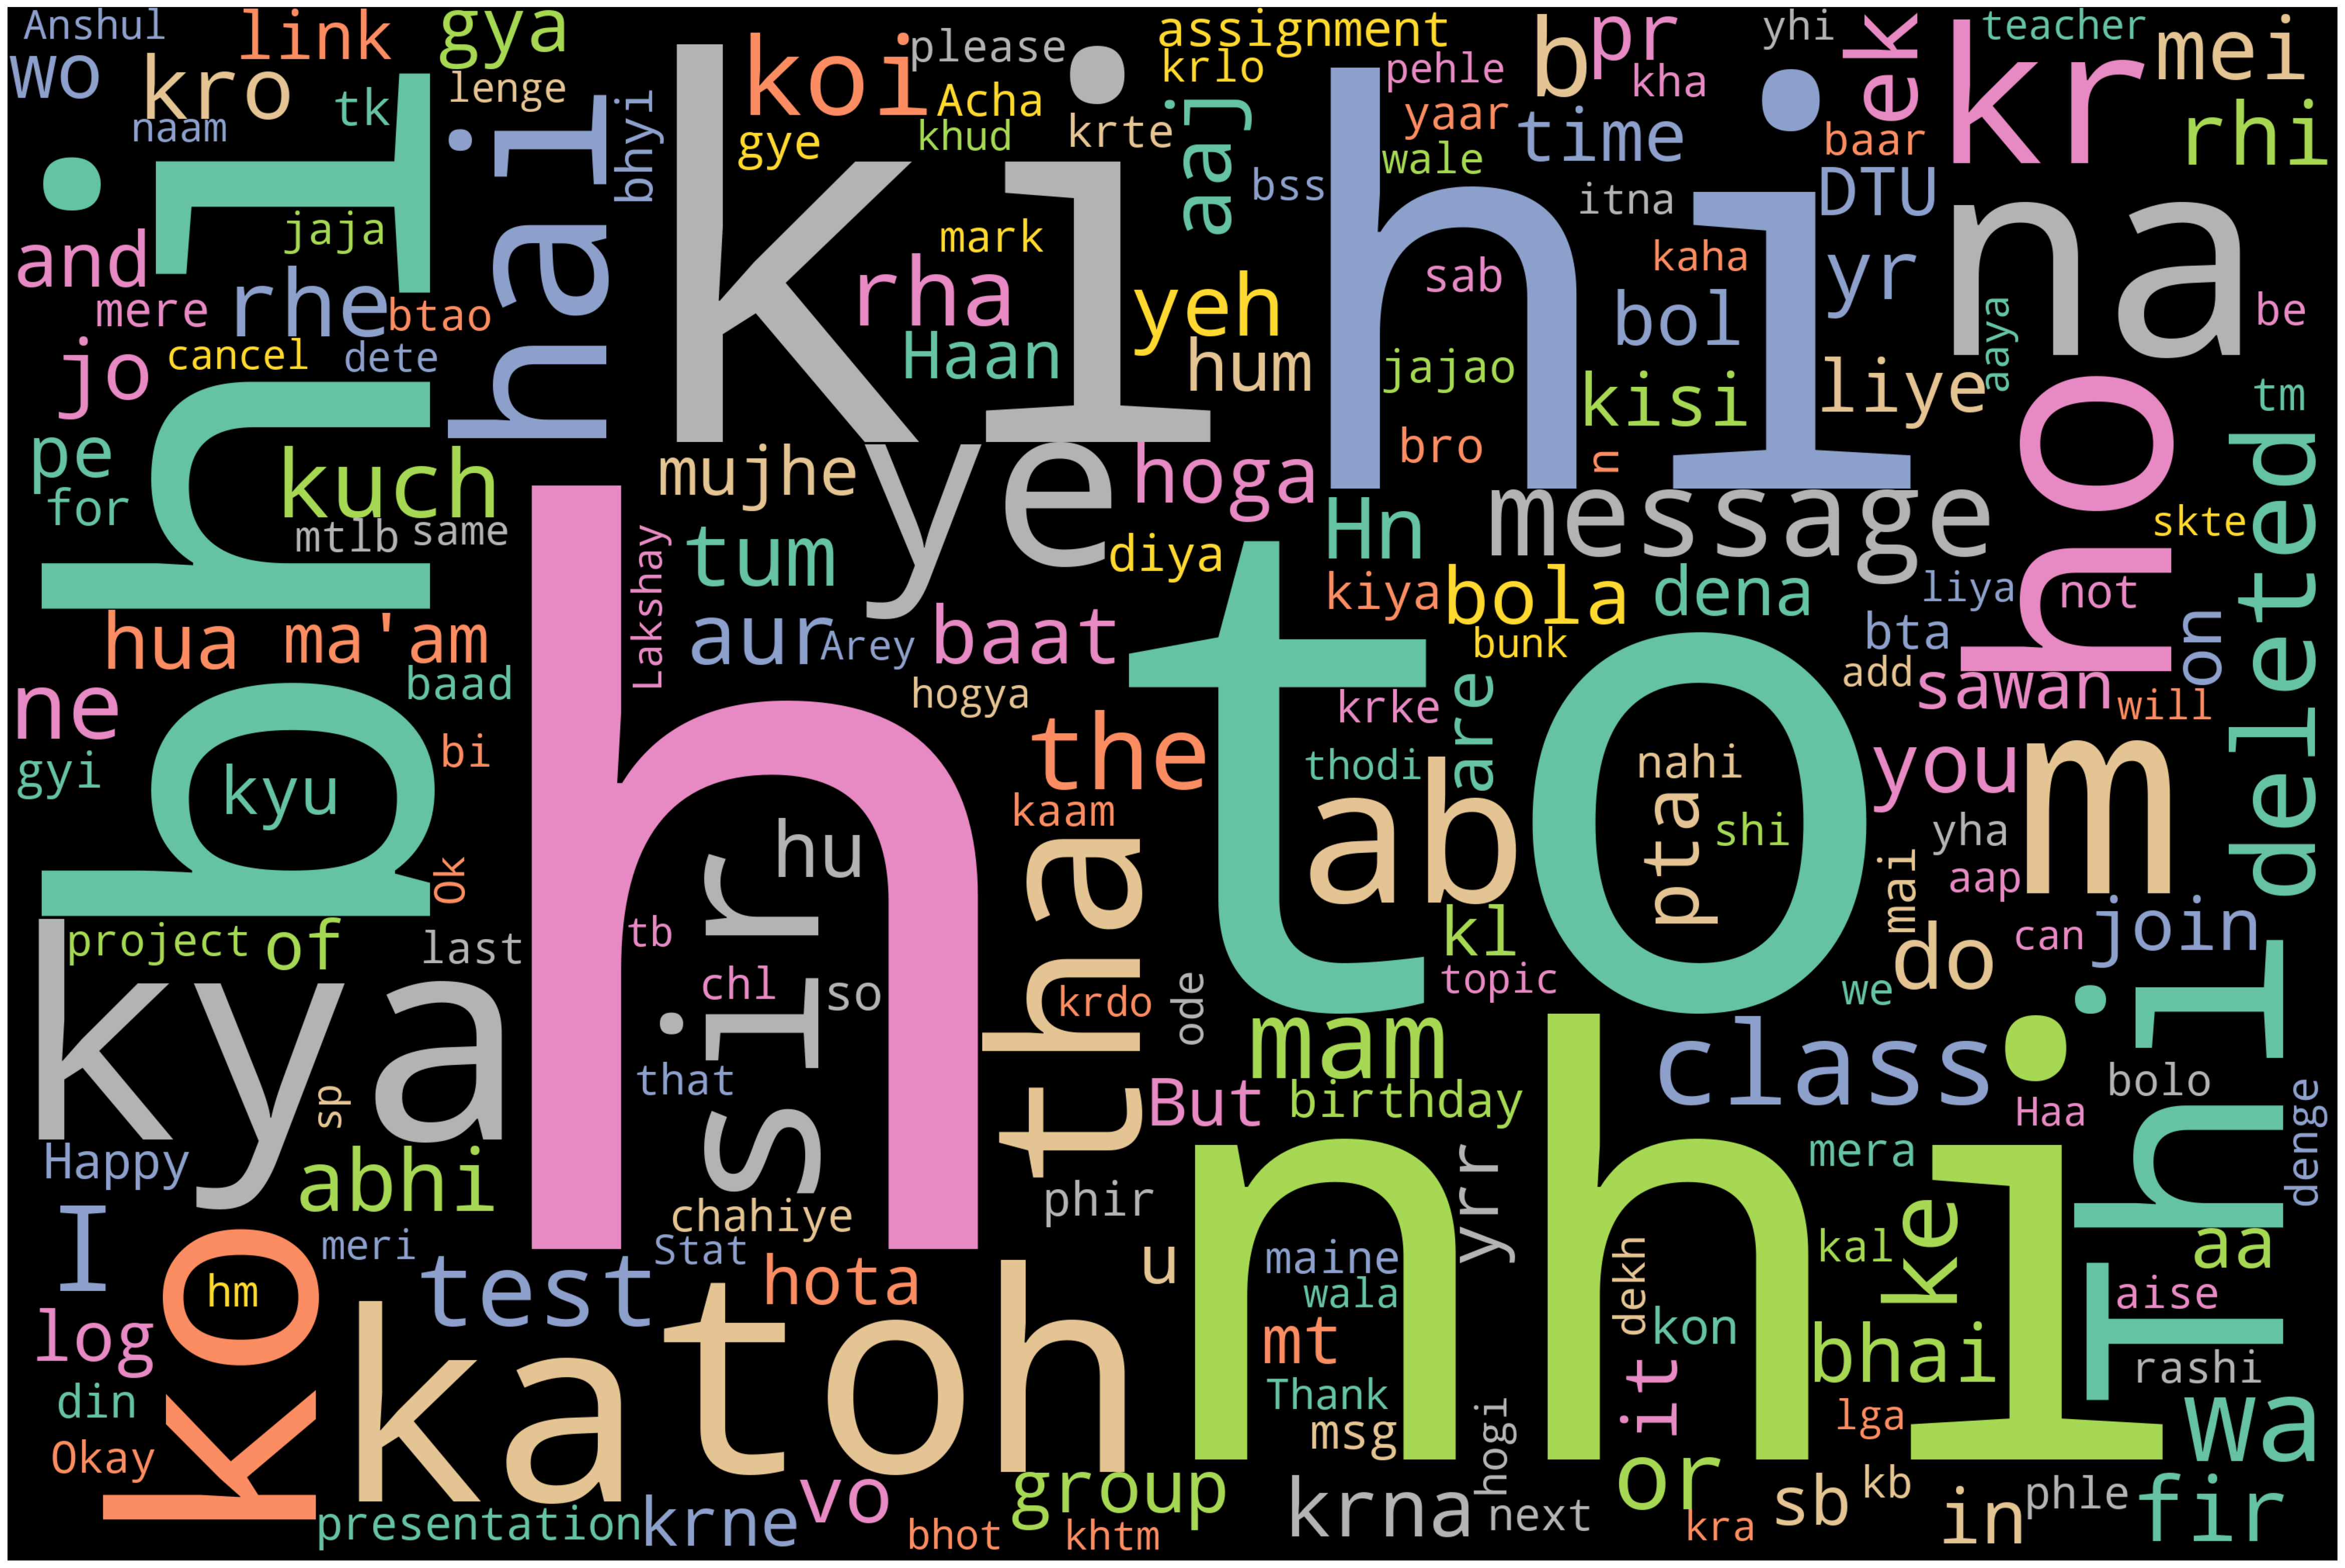

In [32]:
chat_word_cloud = chat[['Message']].copy()

chat_word_cloud['Message']= chat_word_cloud['Message'].apply(remove_urls)
chat_word_cloud['Message']= chat_word_cloud['Message'].replace('nan', np.NaN)
chat_word_cloud['Message']= chat_word_cloud['Message'].replace('', np.NaN)
chat_word_cloud['Message']= chat_word_cloud.Message.str.replace(r"(a|j)?(ja)+(a|j)?", "jaja")
chat_word_cloud['Message']= chat_word_cloud.Message.str.replace(r"(a|j)?(jaja)+(a|j)?", "jaja")
text = " ".join(review for review in chat_word_cloud.Message.dropna())
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
background_color='black', colormap='Set2', collocations=False,
stopwords = stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [33]:
pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## All about the emojis used in the group


In [34]:
total_emojis_list = list(set([a for b in chat.emoji for a in b]))

total_emojis = len(total_emojis_list)

print('Sum of all used Emojis', total_emojis)

Sum of all used Emojis 77


In [35]:
total_emojis_list = list([a for b in chat.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df.head(10)

emoji  count
0     😂  16948
1     🤣   4641
2     🥲   3782
3     🥺    736
4     🙂    648
5     😅    524
6     🤭    374
7     😭    362
8     🥳    306
9     🤩    230

## Treemap of emojis

In [36]:
fig = px.treemap(emoji_df, path= ['emoji'],values = emoji_df['count'].tolist(),)
fig.show()

## CONCLUSION

We have concluded our result as the top used emoji is 😂, it can be shown that it is a 'Fun Group'.


# Thank You